**<center>Continuação**

In [5]:
from PIL import Image

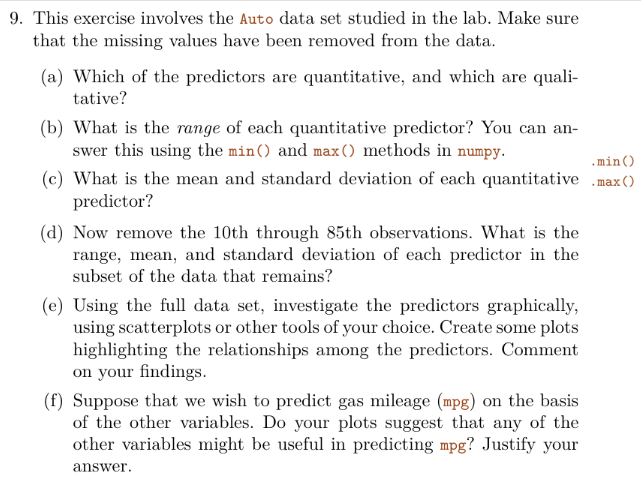

In [6]:
img = Image.open('exercicioAuto.png')
img

Carregue dados e remova os dados incompletos

In [7]:
import pandas as pd
import numpy as np

In [8]:
auto = pd.read_csv('Auto.csv',na_values=['?'])

In [9]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


Breve descrição das variáveis
* mpg: milhas por galão
* cilindros: número de cilindros entre 4 e 8
* cilindrada (displacement): cilindrada do motor (polegadas cúbicas)
* potência: potência do motor
* peso: peso do veículo (lbs.)
* aceleração: tempo para acelerar de 0 a 60 mph (seg.)
* ano: ano modelo (módulo 100)
* origem: origem do carro (1. Americano, 2. Europeu, 3. Japonês)

In [10]:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

**a) Quais dos preditores (variáveis) são quantitativos e quais são categóricos (qualitativos)?**

São quantitativas:
* mpg
* displacement
* horsepower
* weight
* acceleration

São qualitativas
* cylinders
* year
* origin

**b) Qual é o intervalo de valores de cada preditor quantitativo? Para isto, use os métodos min() e max() do numpy.**

In [11]:
auto.mpg.min(), auto.mpg.max()

(9.0, 46.6)

In [12]:
for c in ['mpg', 'displacement', 'horsepower','weight','acceleration']:
    print(c, "    ",   auto[c].min(),  "   " , ",",  auto[c].max())

mpg      9.0     , 46.6
displacement      68.0     , 455.0
horsepower      46.0     , 230.0
weight      1613     , 5140
acceleration      8.0     , 24.8


In [13]:
for c in ['mpg', 'displacement', 'horsepower','weight','acceleration']:
    print(f"{c} \t {auto[c].min()} \t {auto[c].max()}")

mpg 	 9.0 	 46.6
displacement 	 68.0 	 455.0
horsepower 	 46.0 	 230.0
weight 	 1613 	 5140
acceleration 	 8.0 	 24.8


**<center>Parou aqui**

In [14]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [15]:
auto = auto.dropna().reset_index(drop=True)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
# Saída formatado com print

In [16]:
for c in ['mpg', 'displacement', 'horsepower','weight','acceleration']:
    print(f"{c:12} {auto[c].min():12.4f} {auto[c].max():12.4f}")

mpg                9.0000      46.6000
displacement      68.0000     455.0000
horsepower        46.0000     230.0000
weight          1613.0000    5140.0000
acceleration       8.0000      24.8000


**c) Qual é a média e o desvio padrão de cada valor quantitativo?**

O desvio padrão é uma medida de dispersão que indica o quanto os valores de um conjunto de dados estão dispersos em relação à média desse conjunto. 
Em outras palavras, o desvio padrão quantifica a variabilidade ou a dispersão dos valores em torno da média.

Cálculo do desvio padrão:
1) calcule a diferença entre cada valor do conjunto de dados e a média desse conjunto: xi - m
2) eleve essas diferenças ao quadrado (xi - m)^2
3) some esses valores quadrados
4) divida esta soma pela quantidade total de observações
5) tire a raiz quadrada do resultado

In [ ]:
#sympy

In [4]:
from sympy import symbols, sqrt, Sum, pprint
xi, m = symbols('x_i m')
N = symbols('N')
desvio_padrao = sqrt(Sum((xi - m)**2, (xi, 1, N))/N)
pprint(desvio_padrao) # SymPy Pretty Print

           ___________________
          ╱   N               
         ╱   ___              
        ╱    ╲                
       ╱      ╲             2 
      ╱       ╱    (-m + xᵢ)  
     ╱       ╱                
    ╱        ‾‾‾              
   ╱        xᵢ = 1            
  ╱         ───────────────── 
╲╱                  N         


In [17]:
for c in ['mpg', 'displacement', 'horsepower','weight','acceleration']:
    print(f"{c:12} {auto[c].mean():12.4f} {auto[c].std():12.4f}")

mpg               23.4459       7.8050
displacement     194.4120     104.6440
horsepower       104.4694      38.4912
weight          2977.5842     849.4026
acceleration      15.5413       2.7589


O desvio padrão é uma medida de variabilidade que indica o quanto os valores de um conjunto de dados variam em torno da média.

Para quantificar a variabilidade, usa-se o Coeficiente de Variação (CV):

CV = Desvio_Padrão / Média * 100

Interpretação:

CV baixo: 10% a 20%. Baixa variabilidade => dados consistentes: apresentam pouca variabilidade ou dispersão ao redor da média e são previsíveis e uniformes, o que significa que as observações não diferem muito entre si e tendem a seguir um padrão regular.<br>
CV moderado: 20% e 30%. Variabilidade média.<br>
CV alto: acima de 30%. Alta variabilidade => dados bastante dispersos.

In [19]:
for c in ['mpg', 'displacement', 'horsepower','weight','acceleration', 'year']:
    cv = auto[c].std() / auto[c].mean() * 100
    if cv < 20:
        varia = 'consistente'
    elif cv < 30:
        varia = 'moderado'
    else:
        varia = 'alta variabilidade'
    print(f'{c:12} {auto[c].mean():12.4f} {auto[c].std():12.4f} {cv:4.0f}%    {varia}')

mpg               23.4459       7.8050   33%    alta variabilidade
displacement     194.4120     104.6440   54%    alta variabilidade
horsepower       104.4694      38.4912   37%    alta variabilidade
weight          2977.5842     849.4026   29%    moderado
acceleration      15.5413       2.7589   18%    consistente
year              75.9796       3.6837    5%    consistente


**d) Agora remova da 10ª à 85ª observações. Qual é o intervalo, a média e o desvio padrão de cada preditor no subconjunto dos dados que permanecem?**

In [22]:
auto[10:15]

# exibe do índice 10 até o índice 14
#          inclusive              exclusive

# ou 

# exibe do décimo primeiro até o décimo quinto
#           índice 10            índice 14       
#           exclusive            inclusive

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
10,15.0,8,383.0,170.0,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
12,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii


In [26]:
slice =auto.drop(auto.index[9:85]).reset_index(drop=True)
slice

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
311,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
312,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
313,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
314,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [33]:
auto.iloc[0]

mpg                                  18.0
cylinders                               8
displacement                        307.0
horsepower                          130.0
weight                               3504
acceleration                         12.0
year                                   70
origin                                  1
name            chevrolet chevelle malibu
Name: 0, dtype: object

In [35]:
for c in ['mpg', 'displacement', 'horsepower','weight','acceleration', 'year']:
    cv = slice[c].std() / slice[c].mean() * 100
    if cv < 20:
        varia = 'consistente'
    elif cv < 30:
        varia = 'moderado'
    else:
        varia = 'alta variabilidade'
    print(f'{c:12} {slice[c].mean():12.4f} {slice[c].std():12.4f} {cv:4.0f}%    {varia}')

mpg               24.4044       7.8673   32%    alta variabilidade
displacement     187.2405      99.6784   53%    alta variabilidade
horsepower       100.7215      35.7089   35%    alta variabilidade
weight          2935.9715     811.3002   28%    moderado
acceleration      15.7269       2.6937   17%    consistente
year              77.1456       3.1062    4%    consistente


**e) Usando o conjunto completo de dados, investigue os preditores graficamente, usando gráficos de dispersão ou outras ferramentas de sua escolha. Crie alguns gráficos destacando as relações entre os preditores. Comente sobre suas descobertas.**

In [ ]:
#pandas

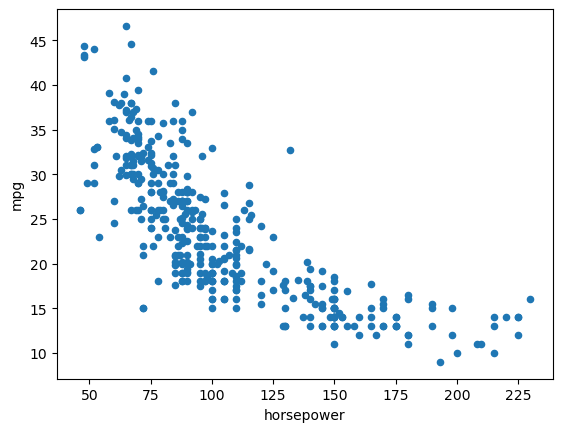

In [38]:
auto.plot.scatter('horsepower','mpg');

In [ ]:
#seaborn

C:\Users\sandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sandr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

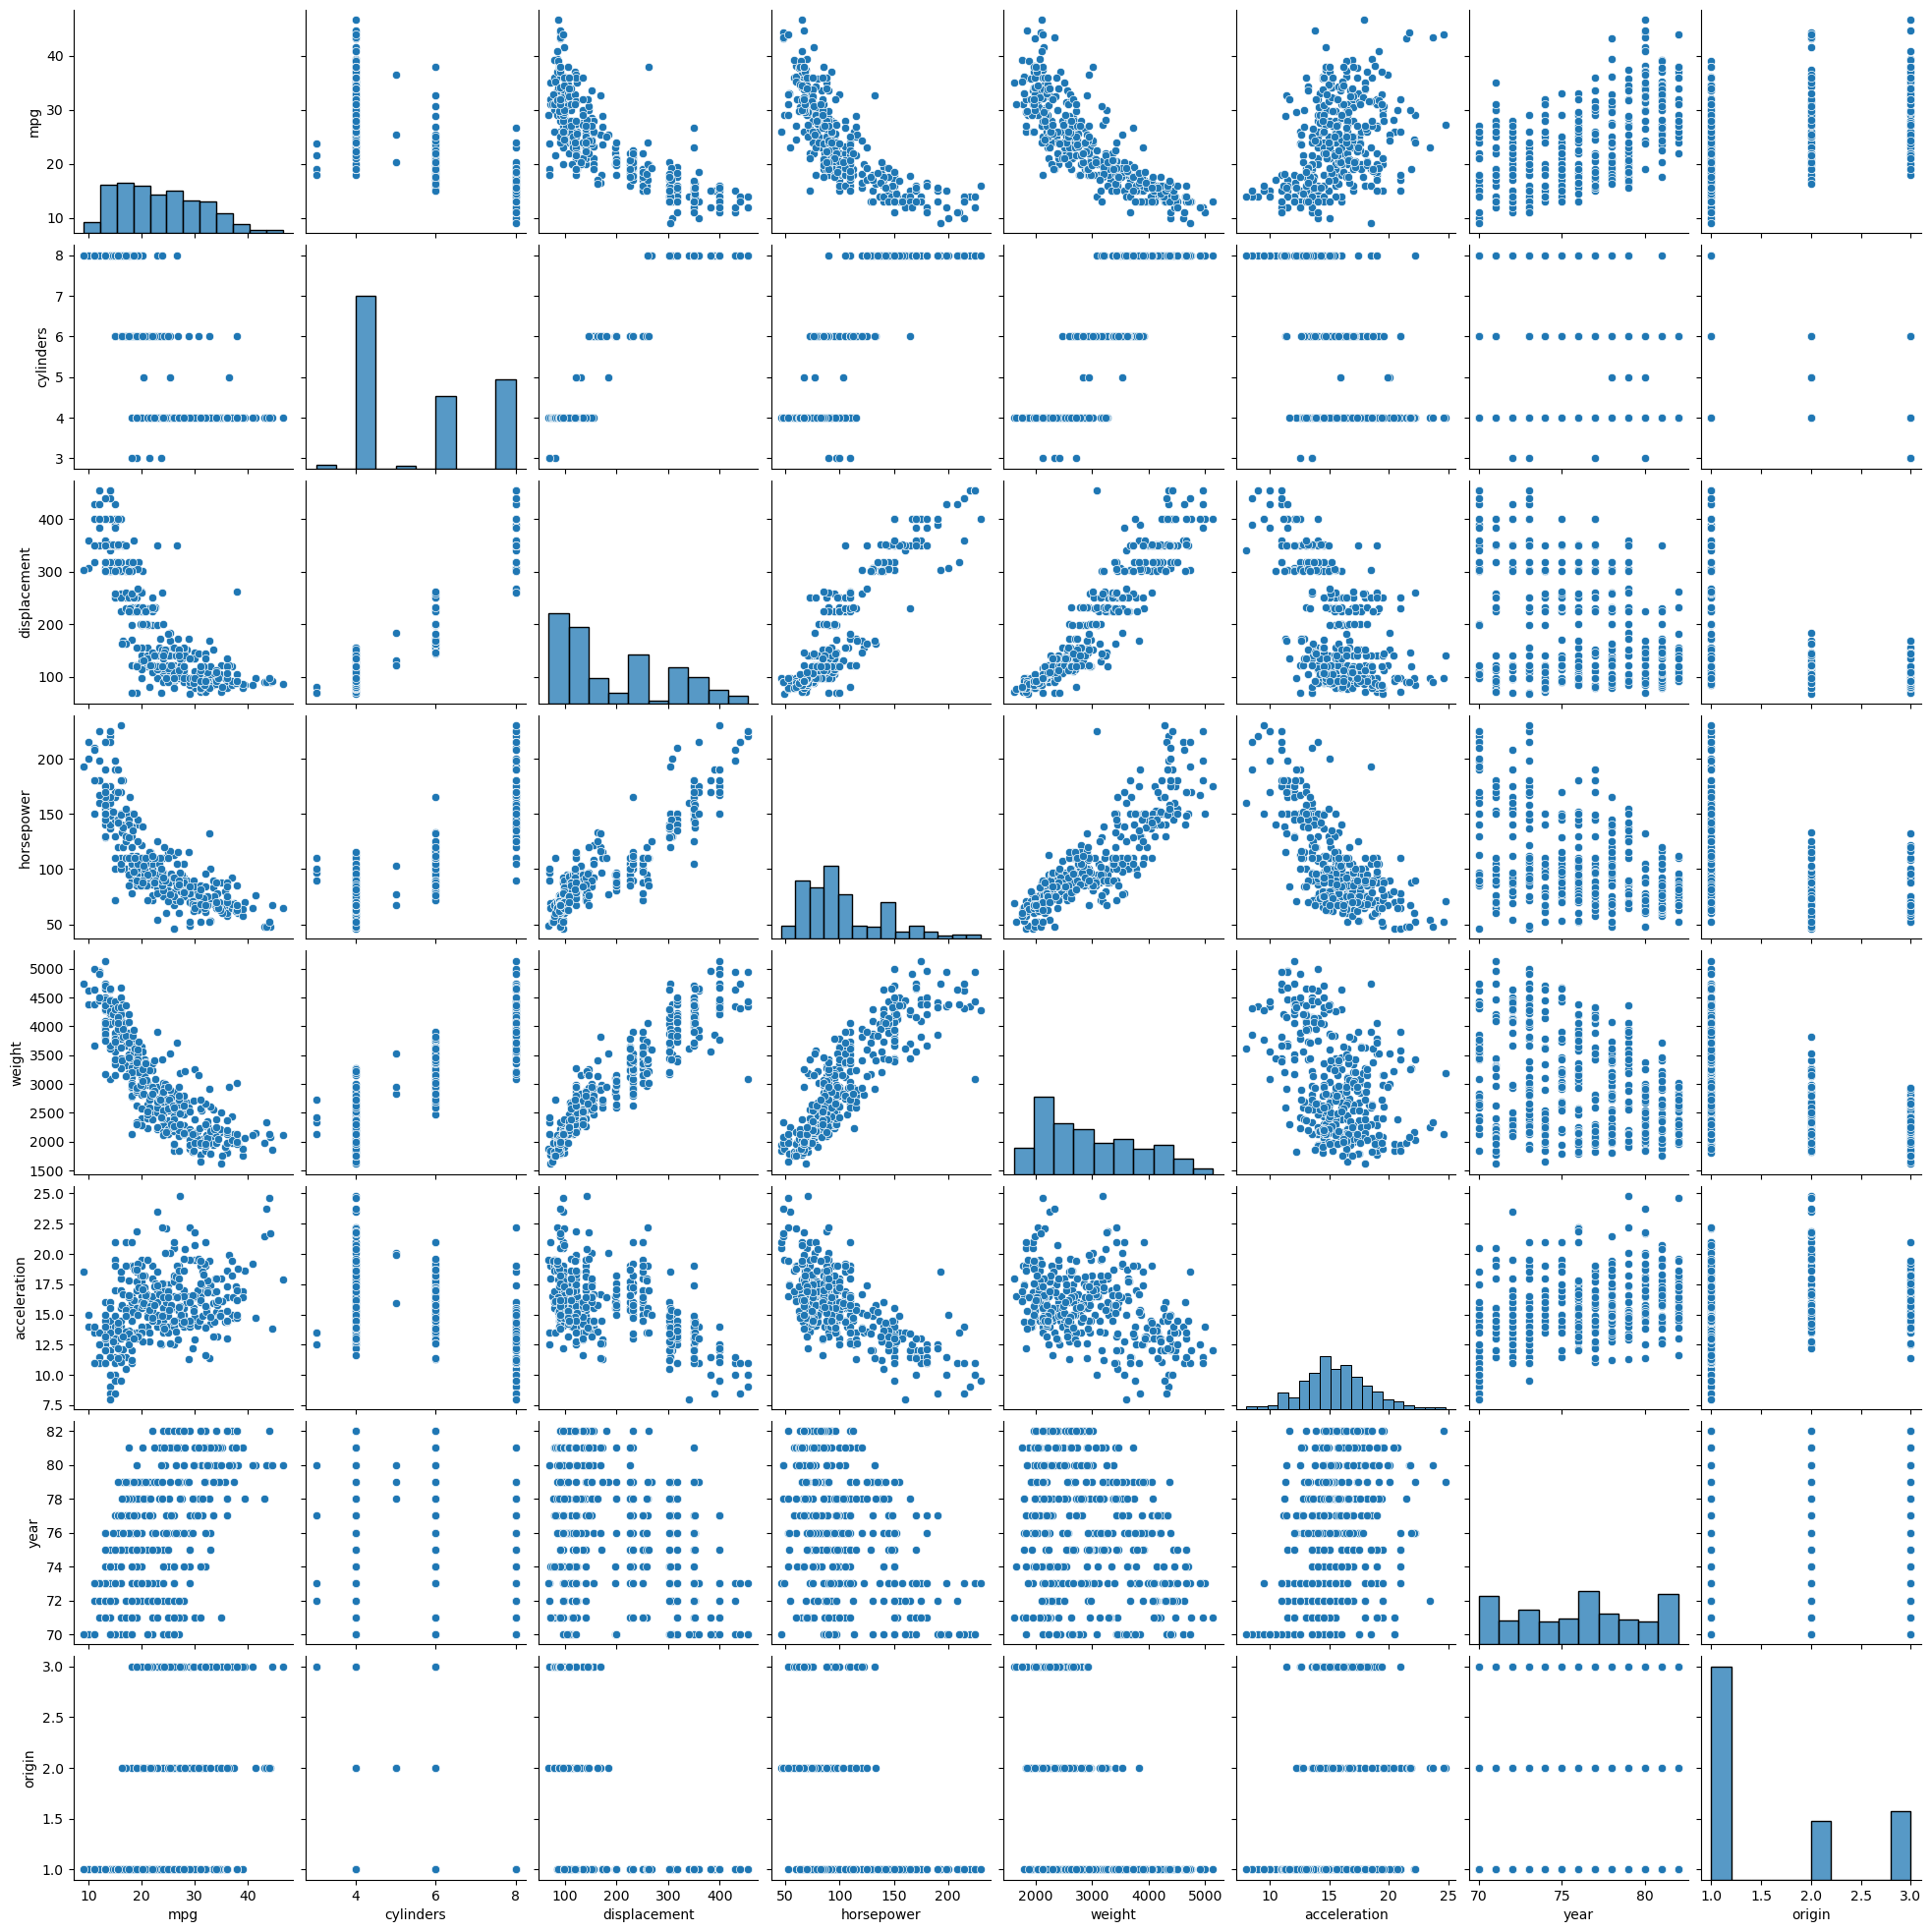

In [39]:
import seaborn as sns
sns.pairplot(auto);

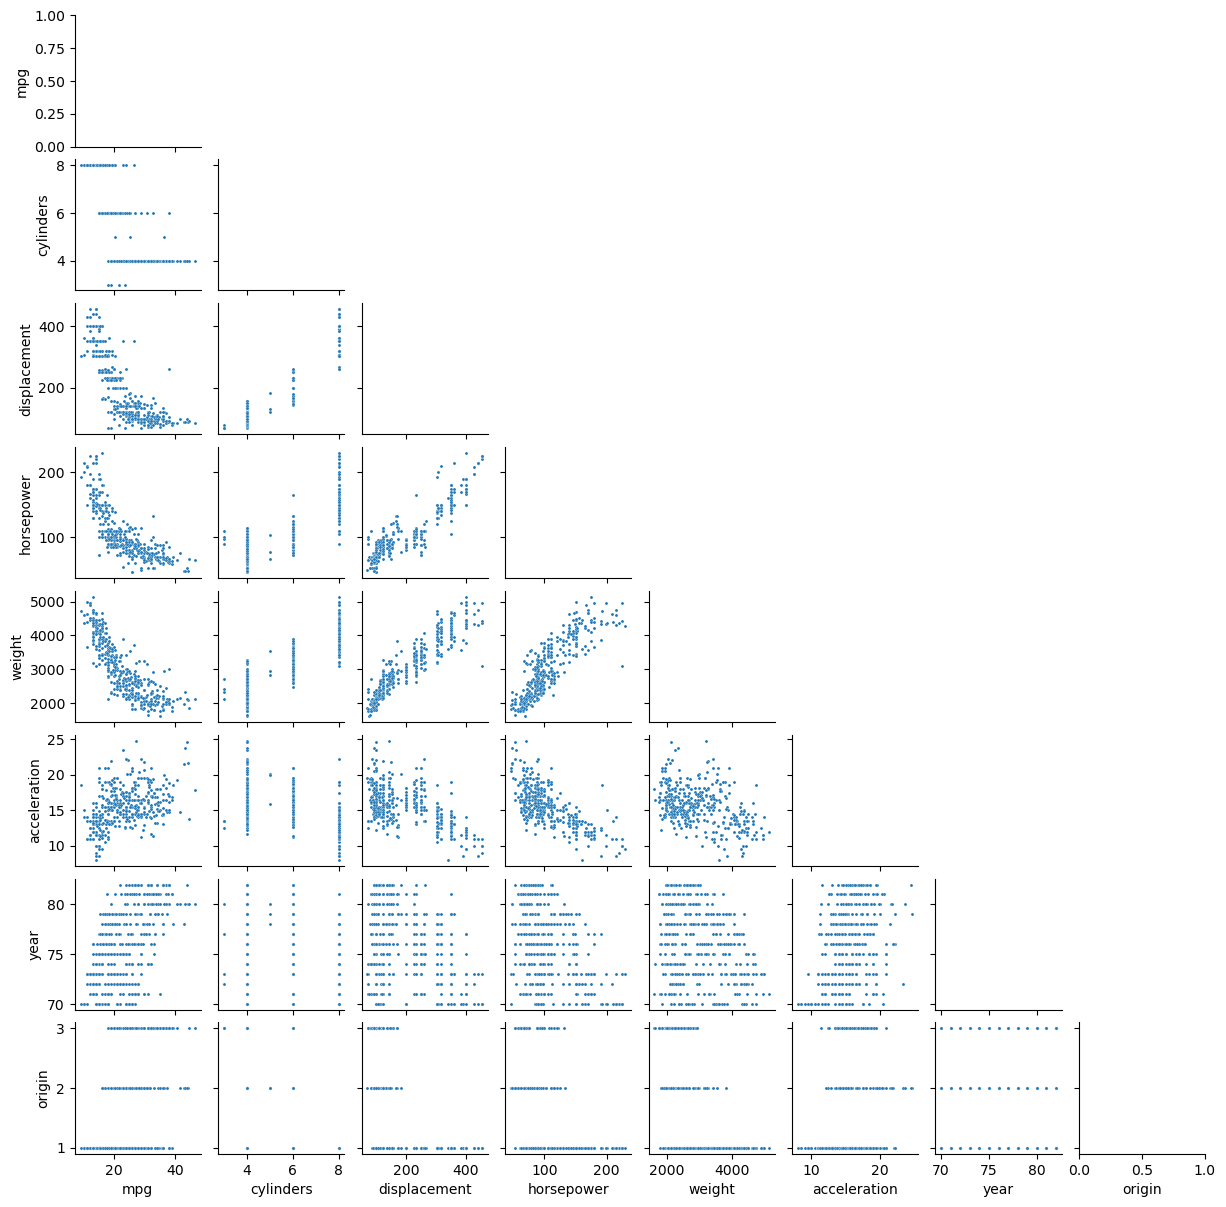

In [40]:
g = sns.PairGrid(auto, corner=True)
g.map_lower(sns.scatterplot, s=5)
g.fig.set_size_inches(12,12)

In [ ]:
#matplotlib

**f) Suponha que desejamos prever o consumo de combustível (mpg) com base nas outras variáveis. Seus gráficos sugerem que alguma das outras variáveis pode ser útil na previsão de mpg? Justifique sua resposta.**